In [ ]:
!nvidia-smi

Mon Apr  1 16:08:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch

In [ ]:
import torchvision

## Loading MNIST dataset from Trochvision Library

In [ ]:
from torchvision import transforms

transform = transforms.Compose([
    # you can add other transformations in this list
    transforms.ToTensor()
])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root = "/content/dl_class",train=True,download=True,transform= transform)
test_dataset = torchvision.datasets.MNIST(root = "/content/dl_class",train=False,download=True,transform= transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 98560814.47it/s]


Extracting /content/dl_class/MNIST/raw/train-images-idx3-ubyte.gz to /content/dl_class/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 94122528.22it/s]

Extracting /content/dl_class/MNIST/raw/train-labels-idx1-ubyte.gz to /content/dl_class/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 31875461.58it/s]


Extracting /content/dl_class/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/dl_class/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18658696.15it/s]

Extracting /content/dl_class/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/dl_class/MNIST/raw



In [ ]:
print(f"Total trainign data has {len(train_dataset)}")
print(f"Total testing data has {len(test_dataset)}")

Total trainign data has 60000
Total testing data has 10000


In [ ]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
import matplotlib.pyplot as plt

## Load the downloaded dataset using pytorch Dataloader

Dataloader class in pytroch enable you to load the dataset in batches becuase fititng all data in the memory is not feasible.

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 32) #batch size should always be a mutliple of 2**n
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 32)

In [ ]:
sample1 = iter(test_loader)

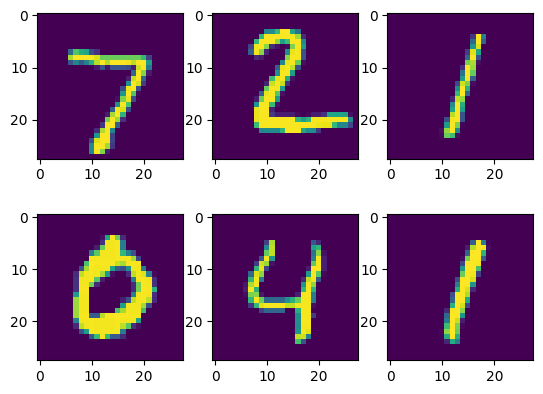

In [ ]:
image, target_val = next(sample1)
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(image[i][0])
plt.show()

#Building Neural Network

In [ ]:
import torch.nn as nn

Home work: try to add the more layers to the model and obsreve the accuracy

In [ ]:
class CustomNeuralNetwork(nn.Module):

  def __init__(self):
    super(CustomNeuralNetwork,self).__init__()

    self.layer1 = nn.Linear(784, 500)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(500, 250)
    self.layer3 = nn.Linear(250, 125)
    self.layer4 = nn.Linear(125, 10)

  def forward(self, x):
    out1 = self.layer1(x)
    out2 = self.relu(out1)
    out3 = self.layer2(out2) # the output layer never to be activated
    out4 = self.relu(out3)
    out5 = self.layer3(out4)
    out6 = self.relu(out5)
    out7 = self.layer4(out6)
    return out7

In [ ]:
model = CustomNeuralNetwork()

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(device)

cuda


In [ ]:
model.to(device)

CustomNeuralNetwork(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=250, bias=True)
  (layer3): Linear(in_features=250, out_features=125, bias=True)
  (layer4): Linear(in_features=125, out_features=10, bias=True)
)

In [ ]:
print(model)

CustomNeuralNetwork(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=250, bias=True)
  (layer3): Linear(in_features=250, out_features=125, bias=True)
  (layer4): Linear(in_features=125, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss() #define our loss function here
optimizier = torch.optim.SGD(model.parameters(),lr = 0.005) # define our Gradient Descent for optimising the loss function

# Training Loop

Homework : chnage the epoch to 20, 40, 50 and observe the accuarcy

In [ ]:
import time
start_time=time.time()

for epoch in range(10):
  total_loss = 0
  for (images,labels) in train_loader:
    images = images.reshape(-1,28*28) #this will flatte the 2-D image into 784 pixel long features
    images=images.to(device)
    labels=labels.to(device)
    predicted_label = model(images)
    loss = criterion(predicted_label,labels)
    optimizier.zero_grad()
    loss.backward() # this will compute all diffrentiation w.r.t weights and bias
    optimizier.step() # update the weights by the gradient calucalted in above step
    total_loss = total_loss + loss
  print(f"The model loss as epoch {epoch} is {total_loss}")

end_time=time.time()
print(f'total timed for training the model is {end_time - start_time}')

The model loss as epoch 0 is 4023.058349609375
The model loss as epoch 1 is 1521.92333984375
The model loss as epoch 2 is 809.1932983398438
The model loss as epoch 3 is 668.990234375
The model loss as epoch 4 is 594.065673828125
The model loss as epoch 5 is 536.5023193359375
The model loss as epoch 6 is 485.4460754394531
The model loss as epoch 7 is 438.4661865234375
The model loss as epoch 8 is 396.1159973144531
The model loss as epoch 9 is 359.1264953613281
total timed for training the model is 94.69771122932434


# model Evaluation

In [ ]:
model.eval() # this set the model into evaluations

CustomNeuralNetwork(
  (layer1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=500, out_features=250, bias=True)
  (layer3): Linear(in_features=250, out_features=125, bias=True)
  (layer4): Linear(in_features=125, out_features=10, bias=True)
)

In [ ]:
import numpy as np
avg_acc=[]
with torch.no_grad():
  for (images, labels) in test_loader:
    total_correct = 0
    n_sample = 0
    images = images.reshape(-1,28*28)
    images=images.to(device)
    labels=labels.to(device)
    model_out = model(images)
    pred_out = torch.argmax(model_out,dim=1)
    n_sample = labels.size(0)
    total_correct = total_correct + (pred_out==labels).sum().item()
    accuracy = total_correct/n_sample*100
    # print("Batch Accuracy: ",accuracy)
    avg_acc.append(accuracy)
    # print(pred_out.shape)
    # print(labels.shape)
print(f"the model accuarcy is {np.array(avg_acc).mean()}")

the model accuarcy is 94.55870607028754


In [ ]:
!nvidia-smi

Mon Apr  1 17:09:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0              34W /  70W |    181MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Predicting unknow MNIST image

In [ ]:
predicted_image = torch.argmax(model(test_dataset[20][0].reshape(-1,28*28).to(device)))

In [ ]:
actual_image_label = test_dataset[20][1]